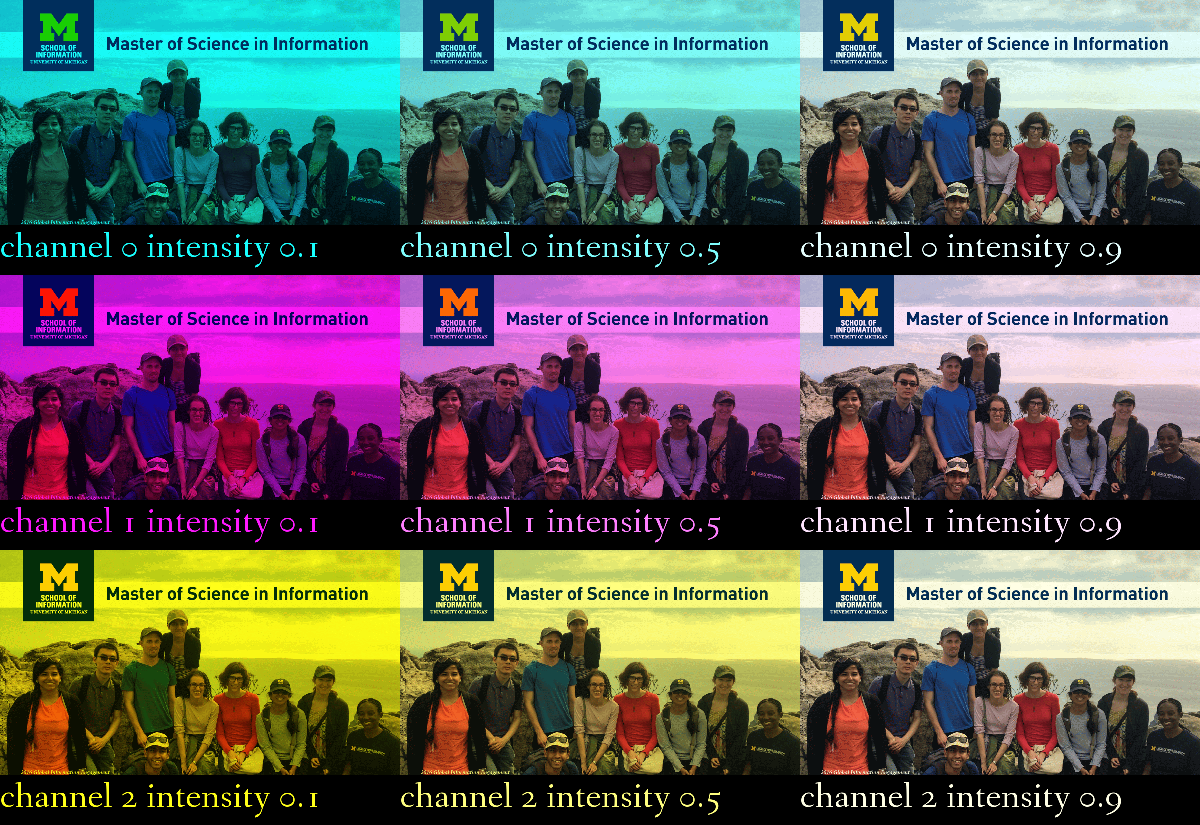

In [20]:
import PIL
from PIL import Image, ImageDraw, ImageFont

image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf",74)

images=[]
labels=[]
color_tups=[]
intensities = [.1,.5,.9]
for i in range(3):
    for ints in intensities:
        source = image.split()
        out = source[i].point(lambda i: i * ints)
        source[i].paste(out)
        im = Image.merge("RGB", source)
        images.append(im)
        labels.append('channel {} intensity {}'.format(i,ints))
        cl = [255,255,255]
        cl[i] = int(ints*cl[i])
        color_tups.append(tuple(cl))

first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,(first_image.height*3)+3*100))
x=0
y=0


obj = ImageDraw.Draw(contact_sheet)
for i,image in enumerate(images):
    contact_sheet.paste(image, (x, y))
    obj.text((x,y+first_image.height+13), labels[i], font=fnt, fill=color_tups[i])
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height+100
    else:
        x=x+first_image.width


contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)